<h1><b>Лабораторная работа №4 </b></h1>
Линейные модели, SVM и деревья решений

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Загрузка и предобработка данных


In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [7]:

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)



1) проверим наличие пропусков

In [8]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

2) масштабирование признаков

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3) Разделение на обучающую и тестовую выборки

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Обучение моделей

- логистическая регрессия
- SVM
- дерево решений

1) логистическая регрессия

In [11]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

2) SVM

In [12]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

3) дерево решений

In [13]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

## Оценка качества моделей
accuracy и F1-score

In [14]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [15]:

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 0.9824561403508771
F1-score: 0.986046511627907

SVM:
Accuracy: 0.9766081871345029
F1-score: 0.9814814814814815

Decision Tree:
Accuracy: 0.9649122807017544
F1-score: 0.9724770642201835


## Важность признаков в дереве решений

In [16]:
plt.figure(figsize=(12, 6))
plt.barh(data.columns, tree.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

AttributeError: columns

<Figure size 1200x600 with 0 Axes>

## Построение графика для визуализации важности признаков в дереве решений

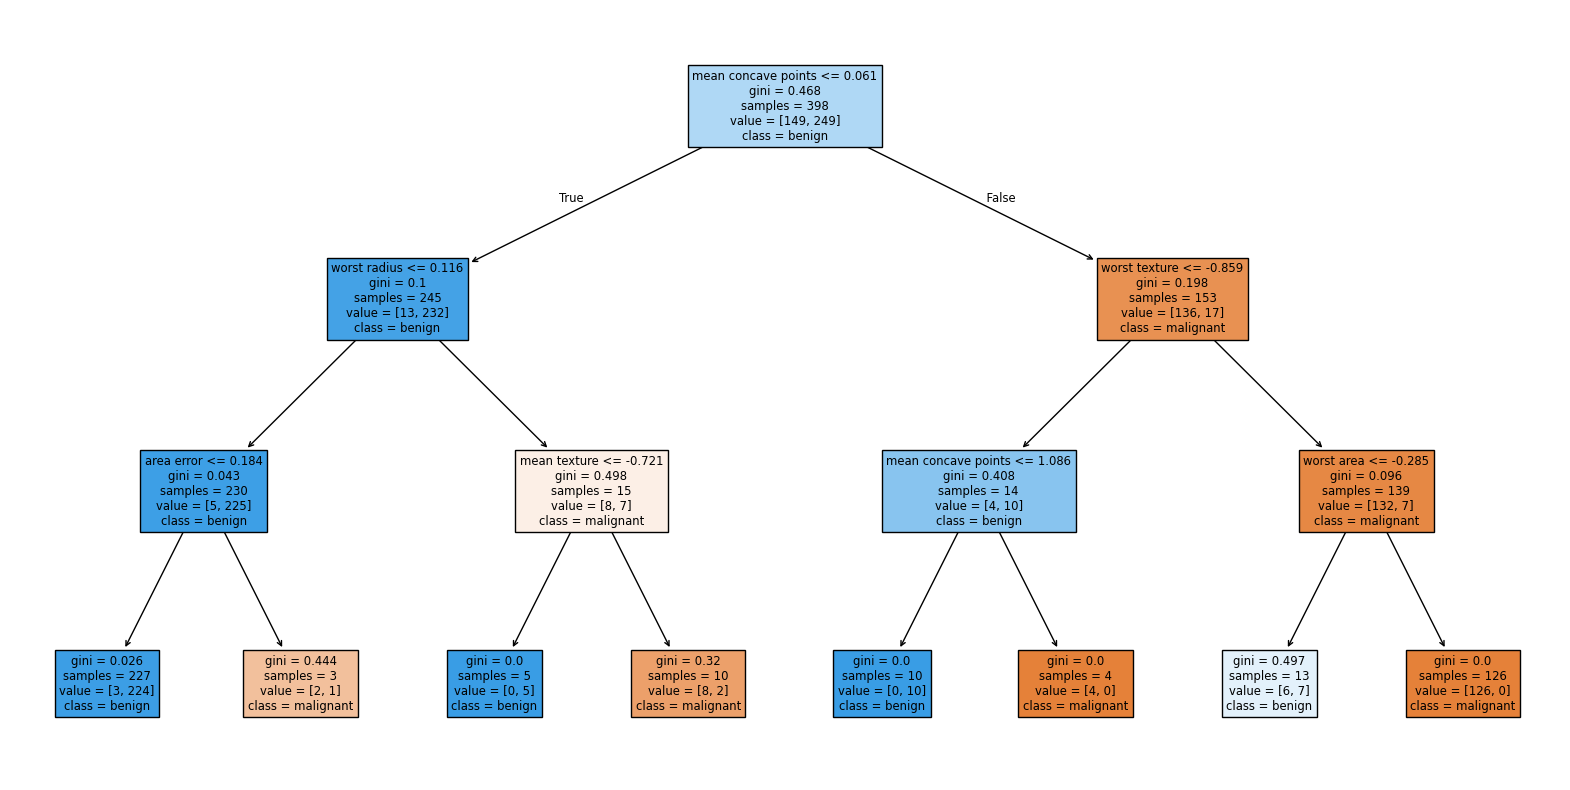

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()